In [2]:
from gensim.models import * 
import math
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

##city list
Cities = [
#Los Angeles
"LAX",
#New York  -73.061719, 40.821452
"NYC",
#miami
"MIA",
#Orlando
"ORL",
#atlanta
"ATL",
#Charlotte
"CHA",
#Nashville
"NAV",
#Louisville
"LOU",
#Cincinnati
"CIN",
#Indianapolis
"IND",
#Columbus
"COL",
#Detroit
"DET",
#Chicago
"CHI",
#Milwaukee
"MIL",
#Minneapolis
"MIN",
#Philadelphia
"PHI",
#Rhode Island
"RHI",
#Washington
"WAS",
#Pittsburgh
"PIT",
#Kansas City
"KAN",
#Denver
"DEN",
#Dallas
"DAL",
#Houston
"HOU",
#Phoenix
"PHX",
#Las Vegas
"LAV",
#San Francisco
"SAF",
#Portland
"POR",
#Seattle
"SEA",
]

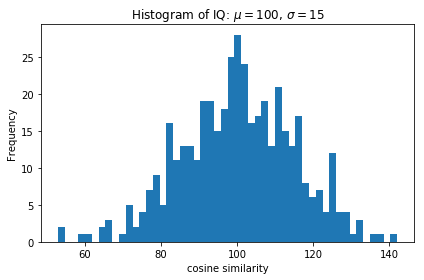

In [66]:
import matplotlib.pyplot as plt



plotHistogram()

In [3]:
biCity = "NYC"
load_path = 'Word2vec_model/bigram/%s/%s_word_model' % (biCity, biCity)
model = Word2Vec.load(load_path)

In [62]:
restaurant = model.wv.similar_by_vector("pavement", topn = 100)
print restaurant

model.wv["pavement"]

[('puddle', 0.7297728657722473), ('puddles', 0.7059352397918701), ('slush', 0.6959547400474548), ('sidewalks', 0.6521784067153931), ('mud', 0.649117112159729), ('sidewalk', 0.6469782590866089), ('shins', 0.6468483209609985), ('slippery', 0.6403456926345825), ('gravel', 0.6358798146247864), ('needle', 0.6312119364738464), ('ground', 0.6265679597854614), ('hooves', 0.6175143122673035), ('elbow', 0.6137189269065857), ('cement', 0.613297700881958), ('icy', 0.6093172430992126), ('pedestrians', 0.5914362072944641), ('wheresspring', 0.5791971683502197), ('pollen', 0.5771841406822205), ('wires', 0.571507453918457), ('ouch', 0.5681573748588562), ('icicles', 0.5679982304573059), ('pigeon', 0.5673814415931702), ('doorway', 0.5669176578521729), ('piles', 0.5640254616737366), ('inthahood', 0.5627344250679016), ('pedal', 0.5618043541908264), ('clouds', 0.560019314289093), ('curb', 0.5597168207168579), ('limbs', 0.5596160888671875), ('slushy', 0.5575383901596069), ('pedestrian', 0.5569482445716858), 

array([-0.02440705,  0.27152723, -0.2127582 ,  0.33905703,  0.37549233,
        0.12043297,  0.12621301, -0.0133537 , -0.06826933, -0.56210142,
        0.06759665, -0.20355158, -0.06013921, -0.02711477, -0.25930524,
        0.45684135, -0.04818499,  0.3075583 , -0.02251803, -0.58554906,
       -0.33252862, -0.07146611,  0.04074633, -0.1449389 ,  0.97027612,
       -0.06852455, -0.40738201, -0.39874715, -0.02835304, -0.63820845,
       -0.38141692, -0.16446517,  0.69991452, -0.43453908,  0.40106669,
       -0.67700446,  0.41436014, -0.38226807, -0.04388965, -0.58125949,
        0.01886067, -0.08825233,  0.0314262 ,  0.50813305, -0.00911816,
        0.24536547,  0.29257637,  0.04589834,  0.01738414,  0.02160809,
        0.34904727,  0.51653153,  0.19666471,  0.18269035,  0.39682618,
        0.25461581, -0.32922539, -0.07395477,  0.2048637 ,  0.19301493,
       -0.00299592,  0.20023003,  0.25785446,  0.02357222,  0.19465119,
       -0.55925214,  0.17899704, -0.32937258, -0.04804525, -0.05

In [26]:
def kNearestWord(k, word, wordEmbed):
    words = wordEmbed.wv.similar_by_vector(word, topn = k)
    res = [[word[0], wordEmbed.wv[word[0]]] for word in words]
    return res

def dotProduct(v1, v2):
    summation = 0
    for i in range(len(v1)):
        summation += v1[i]*v2[i]
    return summation

def magnitude(v1):
    summation = 0
    for ele in v1:
        summation += ele*ele
    return math.sqrt(summation)

def cosineSim(v1, v2):
    return dotProduct(v1, v2)/(magnitude(v1)* magnitude(v2))

#list of top 100 words with sorted frequency
def sortedWordFreq(wordEmbed):
    vocab = wordEmbed.wv.vocab
    res = [[word, wordEmbed.wv.vocab[word].count] for word in vocab]
    res = sorted(res, key=lambda x: x[1], reverse = True)
    return res


# euclidean distance
def euclideanDis(v1, v2):
    summation = 0
    for i in range(len(v1)):
        summation += (v1[i]-v2[i])**2
    return summation


# is the word occurs in all cities
def inAllCities(word):
    for city in Cities:
        load_path = 'Word2vec_model/words/%s/%s_word_model' % (city, city)
        model = Word2Vec.load(load_path)
        if word not in model.wv.vocab.keys():
            return False
    return True


#document frequency
def DF():
    wordIDF = {}
    
    for city in Cities:
        load_path = 'Word2vec_model/words/%s/%s_word_model' % (city, city)
        model = Word2Vec.load(load_path)
        vocab = model.wv.vocab.keys()
        for word in vocab:
            if word in wordIDF:
                wordIDF[word] = wordIDF[word] + 1
            else:
                wordIDF[word] = 1
    
    res = [[word, wordIDF[word]] for word in wordIDF]
    return sorted(res, key=lambda x: x[1], reverse = True)

#compute entropy for all words
def entropy():
    wordEntropy = {}
    for city in Cities:
        print "=============================== Dealing with city: %s ======================================" % city
        load_path = 'Word2vec_model/words/%s/%s_word_model' % (city, city)
        model = Word2Vec.load(load_path)
        vocab = model.wv.vocab.keys()
        totalCount = wordCount(model)
        for word in vocab:
            wordProb = 1.0 * model.wv.vocab[word].count/totalCount
            if word in wordEntropy:
                wordEntropy[word] += -1.0 * wordProb * math.log(wordProb)
            else:
                wordEntropy[word] = -1.0 * wordProb * math.log(wordProb)
    
    print "======================================Sorting the result ==============================================="
    res = [[word, wordEntropy[word]] for word in wordEntropy]
    return sorted(res, key=lambda x: x[1], reverse = True)


#get word count of a model
def wordCount(model):
    res = 0
    for word in model.wv.vocab.keys():
        res += model.wv.vocab[word].count
    return res


def findSimilarWords(word, n, targetCities):
    cityWordDict = {}
    # find top k words in all cities 
    for city in targetCities:
        load_path = 'Word2vec_model/words/%s/%s_word_model' % (city, city)
        model = Word2Vec.load(load_path)
        # if word is not in one city, return empty list
        if word not in model.wv.vocab.keys():
            raise Exception("Word: %s not in %s" % (word, city))
        #put the data in dictionary
        tempDict = {}
        tempList = model.wv.similar_by_vector(word, topn = n)
        for pair in tempList:
            tempDict[pair[0]] = pair[1]
        cityWordDict[city] = tempDict
    return cityWordDict


#find similar words in top k words that each city has
def SimilarWordInTopK(word, k, n):
    searchRange = n
    cityWordDict = {}
    CityWordSet = []
    intersectWordList = [] 
    
    try:
        #find top k words that all city has 
        while len(intersectWordList) < k:
            cityWordDict = findSimilarWords(word, searchRange, Cities)
            for city in cityWordDict:
                CityWordSet.append(set(cityWordDict[city].keys()))

            #intersect the list
            intersectWordList = list(set.intersection(*CityWordSet))
            searchRange = searchRange * 10
            CityWordSet = []
    except Exception as error:
        print('Caught this error: ' + repr(error))
    
    #compute the result
    resultDict = {}
    for city in cityWordDict:
        cityVector = []
        for word in intersectWordList[:k]:
            cityVector.append(cityWordDict[city][word])
        resultDict[city] = cityVector
        
    return resultDict


#find intersection in two lists in order
#the result contains the word, cosineSim in l1, the cosineSim in l2, ex: ["pop", 0.97, 0.97]
def findIntersection(l1, l2, n):
    res = []
    for word in l1:
        for pair in l2:
            if word[0] == pair[0]:
                res.append([word[0], word[1], pair[1]])
    
    return res


#find common words in range n for target cities
def commonWords(wordCityPair, n):
    wordValueList = []
    
    for city in wordCityPair:
        load_path = 'Word2vec_model/words/%s/%s_word_model' % (city, city)
        model = Word2Vec.load(load_path)
        if wordCityPair[city] not in model.wv.vocab.keys():
            raise Exception("Word: %s not in %s" % (wordCityPair[city], city))

        wordValueList.append(model.wv.similar_by_vector(wordCityPair[city], topn = n))
#         print model.wv.similar_by_vector(wordCityPair[city], topn = n)[:20]
    
    return findIntersection(wordValueList[0], wordValueList[1], n)


#second order cosine similarity
def secondOrderCosSim(word1, city1, word2, city2, k, n):
    searchRange = n
    wordCityPair = {city1 : word1, city2 : word2}
    intersectWordList = []
    CityWordSet = []
    
    try:
        #find top k words that two cities have 
        while len(intersectWordList) < k:
            intersectWordList = commonWords(wordCityPair, searchRange)
            searchRange *= 10
    
    except Exception as error:
        print('Caught this error: ' + repr(error))
    
#     print intersectWordList[:k]
    
    v1 = [word[1] for word in intersectWordList[:k]]
    v2 = [word[2] for word in intersectWordList[:k]]
    
    print euclideanDis(v1, v2)
    return cosineSim(v1, v2)
    

In [78]:
secondOrderCosSim("pop", "NYC", "cat", "HOU", 10, 10000)

[['tarts', 0.5893821120262146, 0.3719351291656494], ['popped', 0.5334579348564148, 0.3295425772666931], ['pops', 0.5298942923545837, 0.38308149576187134], ['icona', 0.5187186598777771, 0.2810308337211609], ['spit', 0.5099607110023499, 0.2544040381908417], ['punk', 0.5014297962188721, 0.2896302342414856], ['swing', 0.4739575982093811, 0.29504573345184326], ['rocks', 0.4709302484989166, 0.3594958782196045], ['popping', 0.4648216962814331, 0.2522505819797516], ['cake', 0.46084627509117126, 0.26407352089881897]]


0.9922442322701998

In [43]:
#length is 1015906
wordEn = entropy()

=============================== Dealing with city: LAX ======================================
=============================== Dealing with city: NYC ======================================
=============================== Dealing with city: MIA ======================================
=============================== Dealing with city: ORL ======================================
=============================== Dealing with city: ATL ======================================
=============================== Dealing with city: CHA ======================================
=============================== Dealing with city: NAV ======================================
=============================== Dealing with city: LOU ======================================
=============================== Dealing with city: CIN ======================================
=============================== Dealing with city: IND ======================================
=============================== Dealing with city: COL =====

In [44]:
wordEn

[['job', 1.6268110693678692],
 ['hiring', 1.3743978791124611],
 ['love', 0.9213611389439268],
 ['amp', 0.9101161580933226],
 ['lol', 0.9051743270056003],
 ['jobs', 0.8560215632497014],
 ['day', 0.7811906653208639],
 ['time', 0.7562116164697373],
 ['good', 0.7320590842007882],
 ['careerarc', 0.6509527717326841],
 ['today', 0.6409405713262415],
 ['work', 0.622987922233065],
 ['great', 0.5859481545058656],
 ['gt', 0.578901530371945],
 ['people', 0.5619400190277415],
 ['shit', 0.5454056867844299],
 ['latest', 0.5358513809397882],
 ['night', 0.4979352435730273],
 ['happy', 0.47640784097663247],
 ['life', 0.4717999559859525],
 ['fuck', 0.4668320562840623],
 ['opening', 0.4414774834690311],
 ['click', 0.42278212072116006],
 ['2', 0.42204898897432797],
 ['retail', 0.405747134937204],
 ['tonight', 0.4030324574795183],
 ['home', 0.3853291602660893],
 ['school', 0.383835036396262],
 ['ve', 0.383653415623432],
 ['sales', 0.36968304572439836],
 ['wanna', 0.36707147111698557],
 ['feel', 0.3648801108

In [24]:
cName = "NYC"
load_path = 'Word2vec_model/words/%s/%s_word_model' % (cName, cName)
model = Word2Vec.load(load_path)

model.wv.similar_by_vector("yinz", topn = 20)

[('godwin_niwdog', 0.6749297380447388),
 ('albion212', 0.6676269769668579),
 ('jetlifesensei', 0.66632479429245),
 ('babadook', 0.6615734100341797),
 ('bubs_53', 0.6567327976226807),
 ('dr_zoidberg311', 0.6553256511688232),
 ('smokinn', 0.6547530293464661),
 ('jaynawayna', 0.6509023904800415),
 ('devv_6', 0.6493216156959534),
 ('j_capolupo', 0.6486178040504456),
 ('thera', 0.6485025882720947),
 ('wwolfhoboken', 0.6481689810752869),
 ('m_tish7', 0.6475619673728943),
 ('rebecca__cleary', 0.6473472118377686),
 ('briannewmanny', 0.6472383737564087),
 ('duce_duce22', 0.6465336084365845),
 ('techno__fish', 0.646479070186615),
 ('th3niggab_raw', 0.6462432146072388),
 ('iamviviangreen', 0.6460700631141663),
 ('yeasts', 0.6458092331886292)]

In [7]:
# cosineSim(houstonModel.wv["yall"], pitModel.wv["yinz"])
dfList = DF()

In [126]:
dfList[:1000]

[['spiders', 28],
 ['snuggles', 28],
 ['snuggled', 28],
 ['welcomed', 28],
 ['welcomes', 28],
 ['fir', 28],
 ['fit', 28],
 ['fix', 28],
 ['fig', 28],
 ['fin', 28],
 ['fil', 28],
 ['pumpkins', 28],
 ['rhcp', 28],
 ['planetfitness', 28],
 ['lunches', 28],
 ['angel', 28],
 ['obese', 28],
 ['shiit', 28],
 ['honeymoon', 28],
 ['4thofjuly', 28],
 ['chain', 28],
 ['chair', 28],
 ['exact', 28],
 ['oldies', 28],
 ['ooooooo', 28],
 ['ooooooh', 28],
 ['snatch', 28],
 ['talented', 28],
 ['natalie', 28],
 ['nora', 28],
 ['norm', 28],
 ['hash', 28],
 ['learn', 28],
 ['sauce', 28],
 ['shocking', 28],
 ['swipe', 28],
 ['careerarc', 28],
 ['allin', 28],
 ['allie', 28],
 ['counting', 28],
 ['kno', 28],
 ['knw', 28],
 ['behave', 28],
 ['influence', 28],
 ['victor', 28],
 ['flowing', 28],
 ['losin', 28],
 ['choo', 28],
 ['muchneeded', 28],
 ['sextaik', 28],
 ['staring', 28],
 ['dance', 28],
 ['gymnastics', 28],
 ['subtweets', 28],
 ['integrity', 28],
 ['divorced', 28],
 ['production', 28],
 ['lollipop', 2

In [37]:
testWord = SimilarWordInTopK('nba', 100, 10000)

In [39]:
cosine_similarity([testWord["LAX"]], [testWord["NYC"]])

array([[ 0.99100893]])

In [42]:
secondOrderCosSim('basketball', "LAX", "basketball", "NYC", 100, 1000)

0.483450171714


0.9938053155966825

In [61]:
cName = "NYC"
load_path = 'Word2vec_model/words/%s/%s_word_model' % (cName, cName)
model = Word2Vec.load(load_path)

model.wv.similar_by_vector("park", topn = 50)
# model.wv.most_similar(positive=['chinese', 'italian'], negative=['food'])

[('parks', 0.6111327409744263),
 ('jekyll', 0.574292004108429),
 ('hgitimessquare', 0.5395804047584534),
 ('summerhousefridays', 0.5270951986312866),
 ('prospecttavern', 0.5205514430999756),
 ('pk', 0.5098221302032471),
 ('perk', 0.5061158537864685),
 ('grand', 0.5043127536773682),
 ('thomasjeffersonpark', 0.49229899048805237),
 ('playground', 0.4922086298465729),
 ('guildsomm', 0.48460325598716736),
 ('13n', 0.48285147547721863),
 ('deet', 0.48027217388153076),
 ('prospectpark', 0.47674715518951416),
 ('wtcd', 0.47630807757377625),
 ('pond', 0.4738331139087677),
 ('trail', 0.4717807173728943),
 ('rooftopbiergarten', 0.4715002477169037),
 ('seaglass', 0.4690311849117279),
 ('centralpark', 0.4658629894256592),
 ('158188buses', 0.4580962657928467),
 ('worldtaichiday', 0.4563869535923004),
 ('esplanade', 0.4547121822834015),
 ('hunterdon', 0.45445507764816284),
 ('fields', 0.4541513919830322),
 ('ste', 0.45364710688591003),
 ('centralparknyc', 0.4519442915916443),
 ('hike', 0.443880081176